In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
players=pd.read_csv('Data.csv')
players['region']=players['region'].fillna(0)
players.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [ ]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        461 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


Converting Fpl_sel(object) values to Float values

In [ ]:
srr=players.fpl_sel.values
arr=[]
for x in range(len(srr)):
    j=float(srr[x].replace('%' , ''))
    arr.append(j/100)
srr=arr
players['fpl_sel']=srr
players.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    float64
 9   fpl_points    461 non-null    int64  
 10  region        461 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(4), int64(9), object(4)
memory usage: 61.4+ KB


In [ ]:
players.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,0.032443,57.314534,1.989154,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,0.056757,53.113811,0.961143,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,0.002000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,0.010000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,0.033000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,0.450000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


In [ ]:
players.market_value.median()

7.0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


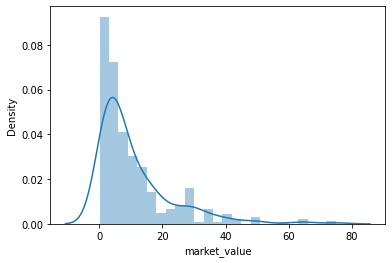

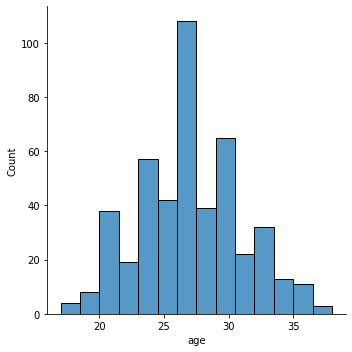

In [ ]:
sns.distplot(players['market_value'])
sns.displot(players['age'])

Above shows the data is right hand skewed 

In [ ]:
players.corr()['market_value'].sort_values()

position_cat   -0.217637
age            -0.132396
age_cat        -0.117682
club_id        -0.046068
new_foreign     0.098056
region          0.103188
new_signing     0.131321
fpl_sel         0.548703
big_club        0.593483
fpl_points      0.615155
page_views      0.739657
fpl_value       0.788653
market_value    1.000000
Name: market_value, dtype: float64

In [ ]:
players1=players.copy()
players1=players1.set_index(['name','club'])
players1.head()
print('Player with most market_value ->',players1['market_value'].nlargest(),players1['market_value'].max(),
      '\nPlayer with least market value ->',players1['market_value'].nsmallest(),players1['market_value'].min())

Player with most market_value -> name             club             
Eden Hazard      Chelsea              75.0
Paul Pogba       Manchester+United    75.0
Alexis Sanchez   Arsenal              65.0
Kevin De Bruyne  Manchester+City      65.0
Sergio Aguero    Manchester+City      65.0
Name: market_value, dtype: float64 75.0 
Player with least market value -> name                 club             
Eduardo Carvalho     Chelsea              0.05
Joel Castro Pereira  Manchester+United    0.10
Niki Maenpaa         Brighton+and+Hove    0.25
Matthew Taylor       Burnley              0.25
Julian Speroni       Crystal+Palace       0.25
Name: market_value, dtype: float64 0.05


Text(0.5, 1.0, 'FPL_Value of players')

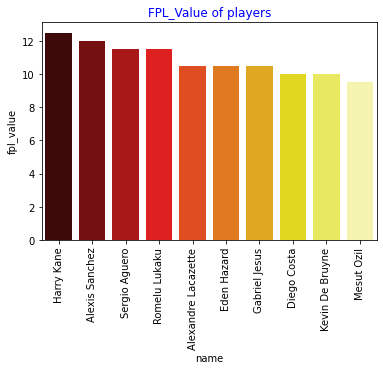

In [ ]:
fpl_players=players.nlargest(10,'fpl_value').sort_values('fpl_value',ascending=False)
sns.barplot(x='name',y='fpl_value',data=fpl_players,palette='hot')
plt.xticks(rotation=90)
plt.title('FPL_Value of players',fontsize=12,color='blue')

Text(0.5, 1.0, 'FPL_Selling of players')

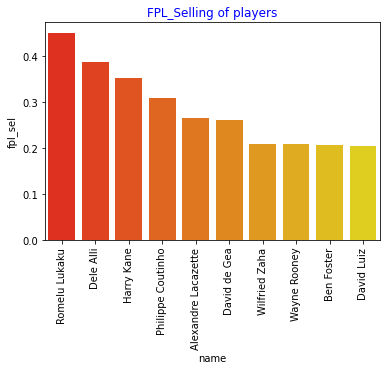

In [ ]:
fpl_players=players.nlargest(10,'fpl_sel').sort_values('fpl_sel',ascending=False)
sns.barplot(x='name',y='fpl_sel',data=fpl_players,palette='autumn')
plt.xticks(rotation=90)
plt.title('FPL_Selling of players',fontsize=12,color='blue')

Text(0.5, 1.0, 'Most viewed pages')

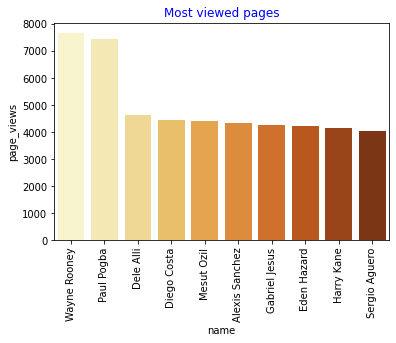

In [ ]:
fpl_players=players.nlargest(10,'page_views').sort_values('page_views',ascending=False)
sns.barplot(x='name',y='page_views',data=fpl_players,palette='YlOrBr')
plt.xticks(rotation=90)
plt.title('Most viewed pages',fontsize=12,color='blue')

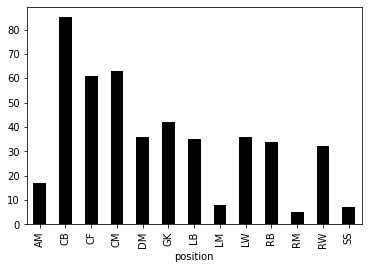

In [ ]:
Positions=players.groupby('position')['club'].count()
Positions.plot.bar(cmap='CMRmap')

In [ ]:
from scipy.stats import chi2_contingency
data = pd.crosstab(players.club, players.position)
stat, p, dof, expected = chi2_contingency(data) 
print(data)
print(stat,p)

position           AM  CB  CF  CM  DM  GK  LB  LM  LW  RB  RM  RW  SS
club                                                                 
Arsenal             1   5   4   3   3   3   3   0   2   2   1   1   0
Bournemouth         0   3   4   4   0   3   2   0   4   2   0   1   1
Brighton+and+Hove   0   4   3   5   0   2   2   0   2   2   1   1   0
Burnley             0   3   3   3   2   1   1   3   0   1   0   1   0
Chelsea             0   4   2   1   3   2   2   0   2   1   1   2   0
Crystal+Palace      1   3   2   3   1   2   3   0   1   2   0   3   0
Everton             2   6   1   3   3   3   1   0   2   3   0   2   2
Huddersfield        1   7   4   5   0   2   2   0   2   1   0   4   0
Leicester+City      0   5   5   2   4   2   2   1   1   1   0   1   0
Liverpool           2   5   4   4   2   2   1   0   3   2   0   1   1
Manchester+City     2   3   3   3   2   2   1   0   2   1   0   1   0
Manchester+United   2   6   3   3   2   3   2   1   1   2   0   0   0
Newcastle+United    

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Relation Payers age and their market value')

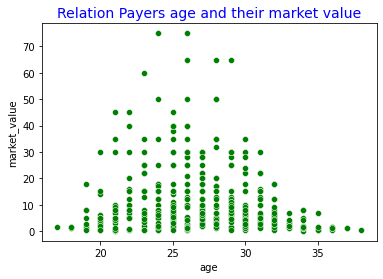

In [ ]:
sns.scatterplot(players['age'],players['market_value'],color='green')
plt.title('Relation Payers age and their market value',color='blue',fontsize=14)

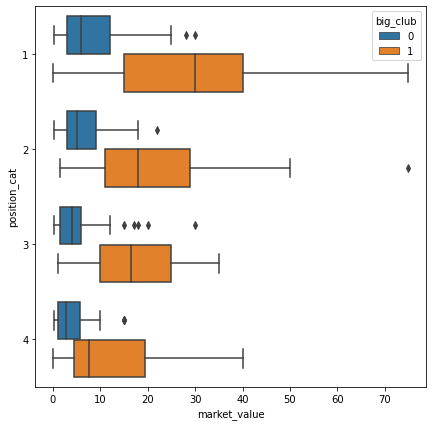

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(y='position_cat',x='market_value',data=players,hue='big_club',orient='h')

It Shows big club players have larger market value

Total no of players from each club

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Total players from each club')

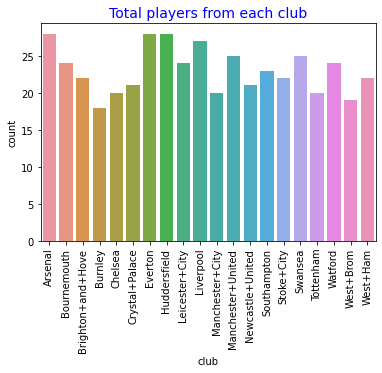

In [ ]:
sns.countplot(players.sort_values('club_id').club)
ax=plt.gca()
for x in ax.xaxis.get_ticklabels():
    x.set_rotation(90)
plt.title('Total players from each club',color='blue',fontsize=14)

Comparing different attributes with market values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Relation of Big_Club vs Market_Value')

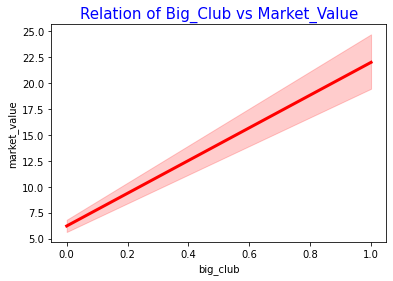

In [ ]:

sns.lineplot(players['big_club'],players['market_value'],color='red',linewidth=3)
plt.title('Relation of Big_Club vs Market_Value',fontsize=15,color='blue')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


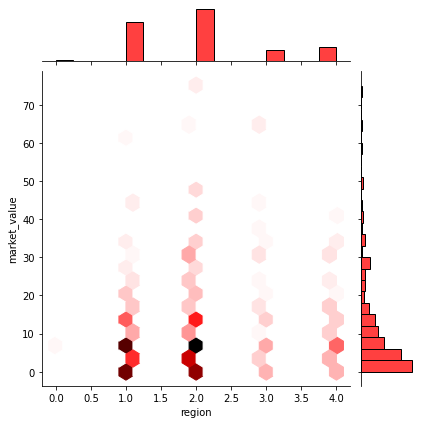

In [ ]:
sns.jointplot(players['region'],players['market_value'],color='red',kind='hex')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Relation of Postion of Player vs Market_Value')

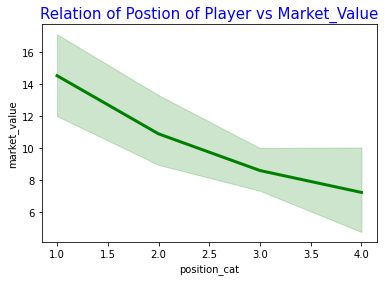

In [ ]:
sns.lineplot(players['position_cat'],players['market_value'],color='green',linewidth=3)
plt.title('Relation of Postion of Player vs Market_Value',fontsize=15,color='blue')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Relation of Players Value in Fantasy Premier League with market value')

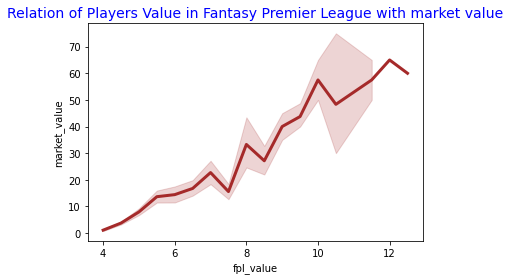

In [ ]:
sns.lineplot(players['fpl_value'],players['market_value'],color='brown',linewidth=3)
plt.title('Relation of Players Value in Fantasy Premier League with market value',fontsize=14,color='blue')

<Figure size 720x720 with 0 Axes>

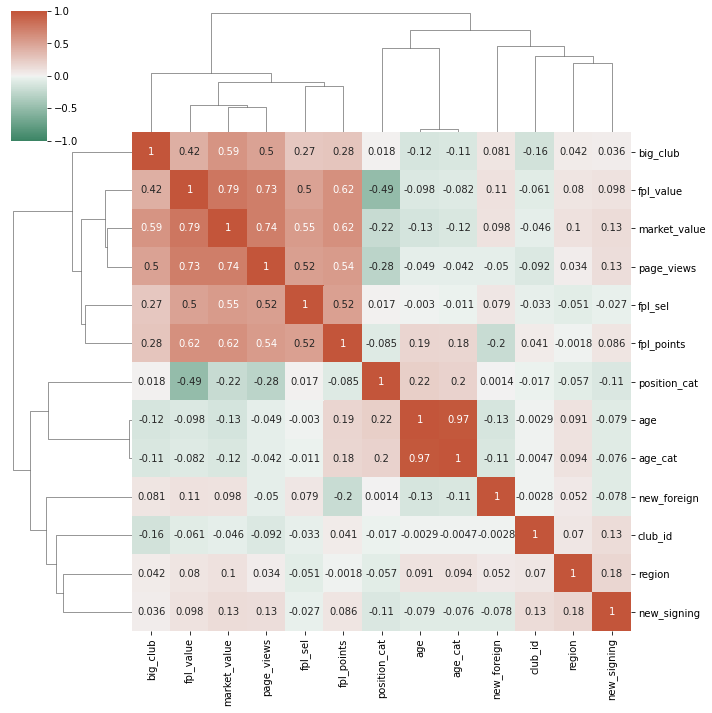

In [ ]:
fig=plt.figure(figsize=(10,10))
sns.clustermap(players.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(150,20,n=200),annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Relation of Players Value in Fantasy Premier League with regards to postions they play')

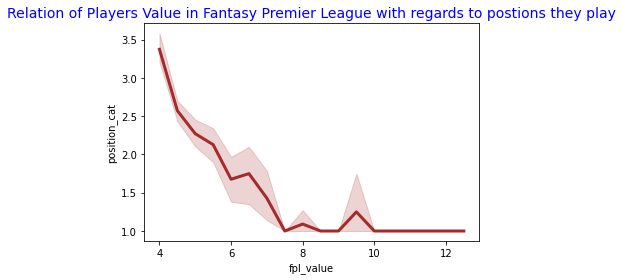

In [ ]:
sns.lineplot(players['fpl_value'],players['position_cat'],color='brown',linewidth=3)
plt.title('Relation of Players Value in Fantasy Premier League with regards to postions they play',fontsize=14,color='blue')

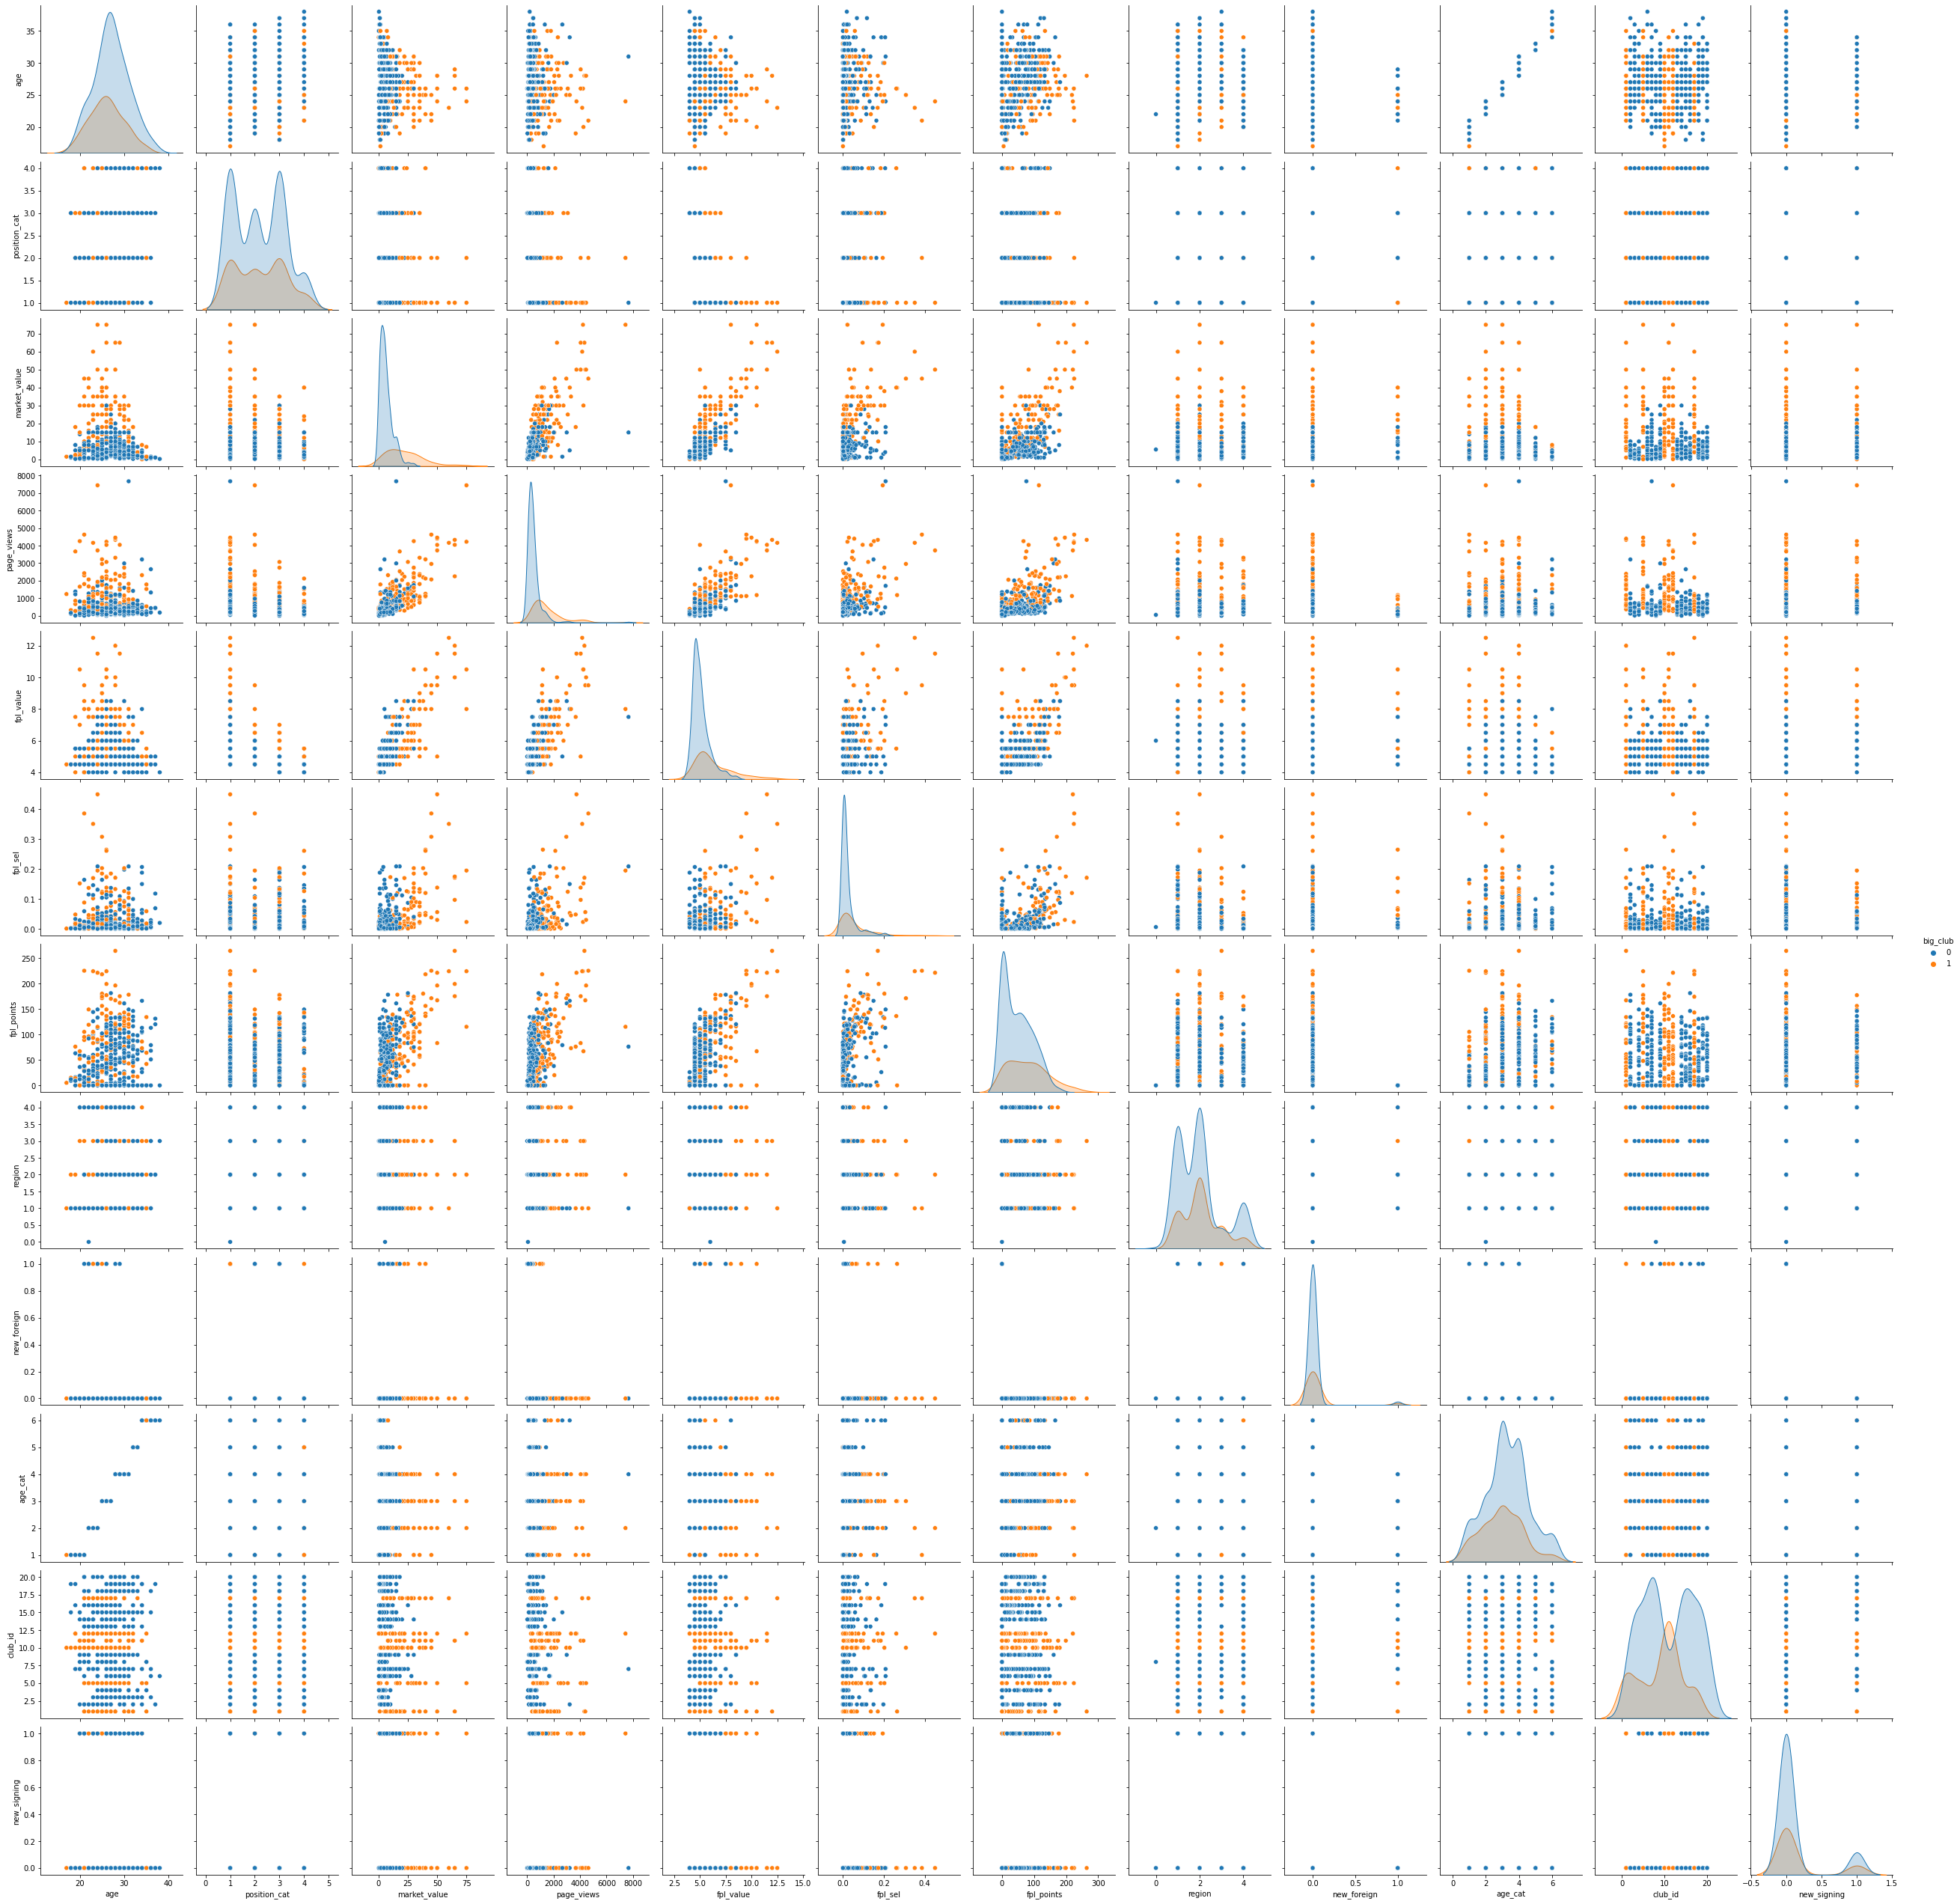

In [ ]:
sns.pairplot(players,hue='big_club',height=3)

Checking for null hypothesis (i.e to reject if p<0.05)

In [ ]:
!pip install bioinfokit
from bioinfokit.analys import stat 
res = stat()
res.levene(df=players, res_var='market_value', xfac_var='club')
res.levene_summary

     |████████████████████████████████| 81kB 3.7MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.3-cp37-none-any.whl size=55622 sha256=bdc790680463cea2b4d916d3e527d37f785f4545317a553db88757f3ae892923
  Stored in directory: /root/.cache/pip/wheels/94/f6/36/f2562d2c83714b882d83a97e56925b363c7b7a4a9eba9d64ad
  Created wheel for adjustText: filename=adjustText-0.7.3-cp37-none-any.whl size=7100 sha256=0ad1e9a83001da08c8edddb3b91ed36bf0d7e429e172f0c20c3ecd1fe26f2a0c
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built bioinfokit adjustText


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Parameter,Value
0,Test statistics (W),8.7866
1,Degrees of freedom (Df),19.0000
2,p value,0.0000


In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
scaler=MinMaxScaler()
X=players[['age','position_cat','page_views','fpl_value','fpl_sel','fpl_points','big_club','region','new_foreign','new_signing']]
y=players[['market_value']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(X_train.shape,y_train.shape)

(299, 10) (299, 1)


Regression Anaysis without Normalization

In [ ]:
import statsmodels.api as sm  
X_train_stats = sm.add_constant(X_train)
lm = sm.OLS(y_train,X_train_stats).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           market_value   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     108.4
Date:                Fri, 07 May 2021   Prob (F-statistic):           1.79e-91
Time:                        03:28:15   Log-Likelihood:                -932.77
No. Observations:                 299   AIC:                             1888.
Df Residuals:                     288   BIC:                             1928.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -9.1566      3.623     -2.528   

In [ ]:
lrmodel=LinearRegression().fit(X_train,y_train)
print('Linear regression linear model intercept: {}'
     .format(lrmodel.intercept_))
print('Linear regression linear model coeff:\n{}'
     .format(lrmodel.coef_))
print('R-squared score (training): {:.3f}'
     .format(lrmodel.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(lrmodel.score(X_test, y_test)))
print('Mean-Squared-Error (train): {:.3f}'
      .format(mean_squared_error(y_train,lrmodel.predict(X_train))))
print('Mean-Squared-Error (test): {:.3f}'
      .format(mean_squared_error(y_test,lrmodel.predict(X_test))))

Linear regression linear model intercept: [-9.15657643]
Linear regression linear model coeff:
[[-3.56507516e-01  5.53786340e-01  8.40458890e-04  3.63287754e+00
   2.33185574e+01  4.38212116e-02  6.97209226e+00  1.05086338e+00
   4.32696351e+00  1.31946102e+00]]
R-squared score (training): 0.790
R-squared score (test): 0.714
Mean-Squared-Error (train): 30.007
Mean-Squared-Error (test): 46.441


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Error Terms')

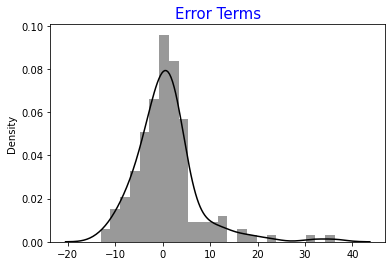

In [ ]:
sns.distplot(y_test - lrmodel.predict(X_test),color='black')
plt.title('Error Terms',fontsize=15,color='blue')

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
scores = cross_val_score(lrmodel, X_train, y_train, cv = 6)    
predictions = cross_val_predict(lrmodel, X_test, y_test, cv = 6)
accuracy = r2_score(y_test, predictions)  
print('R-squared_score (Test)',accuracy)
print('Cross-validation scores (6-fold):', scores)
print('Mean cross-validation score (6-fold): {:.3f}'
     .format(np.mean(scores)))

R-squared_score (Test) 0.7659980879265201
Cross-validation scores (6-fold): [0.72250032 0.70852683 0.84333941 0.81857432 0.57313309 0.7839785 ]
Mean cross-validation score (6-fold): 0.742


Improving the R2 score after cross validating

Regression Analysis with Normalization

In [ ]:
import statsmodels.api as sm  
X_train_stats = sm.add_constant(X_train_scaled)
lm = sm.OLS(y_train,X_train_stats).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           market_value   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     108.4
Date:                Fri, 07 May 2021   Prob (F-statistic):           1.79e-91
Time:                        03:28:16   Log-Likelihood:                -932.77
No. Observations:                 299   AIC:                             1888.
Df Residuals:                     288   BIC:                             1928.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9215      1.140      0.808      0.4

In [ ]:
lrmodel=LinearRegression().fit(X_train_scaled,y_train)
print('Linear regression linear model intercept: {}'
     .format(lrmodel.intercept_))
print('Linear regression linear model coeff:\n{}'
     .format(lrmodel.coef_))
print('R-squared score (training): {:.3f}'
     .format(lrmodel.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(lrmodel.score(X_test_scaled, y_test)))
print('Mean-Squared-Error (train): {:.3f}'
      .format(mean_squared_error(y_train,lrmodel.predict(X_train_scaled))))
print('Mean-Squared-Error (test): {:.3f}'
      .format(mean_squared_error(y_test,lrmodel.predict(X_test_scaled))))


Linear regression linear model intercept: [0.92147705]
Linear regression linear model coeff:
[[-7.13015033  1.66135902  6.43875556 30.8794591  10.49335084 11.56879985
   6.97209226  3.15259014  4.32696351  1.31946102]]
R-squared score (training): 0.790
R-squared score (test): 0.714
Mean-Squared-Error (train): 30.007
Mean-Squared-Error (test): 46.441


In [ ]:
scores = cross_val_score(lrmodel, X_train_scaled, y_train, cv = 6)    
predictions = cross_val_predict(lrmodel, X_test_scaled, y_test, cv = 6)
accuracy = r2_score(y_test, predictions)  
print('R-squared_score (Test)',accuracy)
print('Cross-validation scores (6-fold):', scores)
print('Mean cross-validation score (6-fold): {:.3f}'
     .format(np.mean(scores)))


R-squared_score (Test) 0.7659980879265222
Cross-validation scores (6-fold): [0.72250032 0.70852683 0.84333941 0.81857432 0.57313309 0.7839785 ]
Mean cross-validation score (6-fold): 0.742


(162, 1) (162, 1)


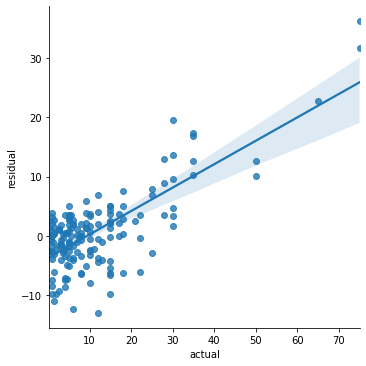

Root Mean Square Error:  6.814735774358781


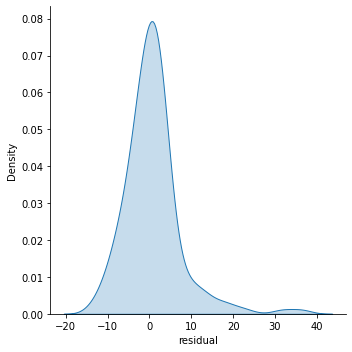

In [ ]:
y_pred = lrmodel.predict(X_test_scaled)  
print(y_pred.reshape(len(y_pred),1).shape,y_test.shape)
preds = y_pred.reshape(len(y_pred),1)
preds.shape
residual_df = pd.DataFrame(np.concatenate([y_test,preds,y_test-preds],axis = 1),columns=['actual','predicted','residual'])
sns.lmplot(x='actual',y='residual',data=residual_df)
plt.show()
print("Root Mean Square Error: ",np.sqrt(1/residual_df.shape[0]*(residual_df.residual).dot(residual_df.residual)))
sns.displot(residual_df, x="residual", kind="kde", fill=True)

Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)
linridge = Ridge(alpha=10.0).fit(X_train, y_train)
print('Ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('Ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Ridge regression linear model intercept: [-12.89555721]
Ridge regression linear model coeff:
[[-3.66293545e-01  1.05934966e+00  1.92770425e-03  4.20261708e+00
   1.08357747e+00  5.22408821e-02  4.92954491e+00  1.08775148e+00
   2.93185701e+00  4.92528045e-01]]
R-squared score (training): 0.777
R-squared score (test): 0.724
Number of non-zero features: 10


Ridge Regression with regulaization parameter alpha

In [ ]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train, y_train)
    r2_train = linridge.score(X_train, y_train)
    r2_test = linridge.score(X_test, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 5, r-squared training: 0.78, r-squared test: 0.72

Alpha = 1.00
num abs(coeff) > 1.0: 5, r-squared training: 0.78, r-squared test: 0.72

Alpha = 10.00
num abs(coeff) > 1.0: 6, r-squared training: 0.78, r-squared test: 0.72

Alpha = 20.00
num abs(coeff) > 1.0: 5, r-squared training: 0.77, r-squared test: 0.72

Alpha = 50.00
num abs(coeff) > 1.0: 4, r-squared training: 0.76, r-squared test: 0.72

Alpha = 100.00
num abs(coeff) > 1.0: 3, r-squared training: 0.75, r-squared test: 0.72

Alpha = 1000.00
num abs(coeff) > 1.0: 0, r-squared training: 0.66, r-squared test: 0.70



Finding perfect alpha value for the model




In [ ]:
# Create 5 folds
from sklearn.linear_model import RidgeCV,LassoCV
seed = 13
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

# Create model
model_rcv = RidgeCV(cv=kfold)

#Fit model
model_rcv.fit(X_train, y_train)
predictions = model_rcv.predict(X_train)
print("Train:", r2_score(y_train, predictions))

# Evaluate
predictions = model_rcv.predict(X_test)
print("Test:", r2_score(y_test, predictions))

print("Alpha:", model_rcv.alpha_)

Train: 0.7808178514331857
Test: 0.7234465520564219
Alpha: 1.0


In [ ]:

linridge_1 = Ridge(alpha=1.0).fit(X_train, y_train)
print('Ridge regression linear model intercept: {}'
     .format(linridge_1.intercept_))
print('Ridge regression linear model coeff:\n{}'
     .format(linridge_1.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge_1.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge_1.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge_1.coef_ != 0)))

Ridge regression linear model intercept: [-13.01866966]
Ridge regression linear model coeff:
[[-3.39410784e-01  9.18497137e-01  1.63734501e-03  4.10012293e+00
   6.19006348e+00  5.24794087e-02  5.65114679e+00  1.07394657e+00
   4.98902449e+00  7.68369655e-01]]
R-squared score (training): 0.781
R-squared score (test): 0.723
Number of non-zero features: 10


(116, 1) (116, 1)


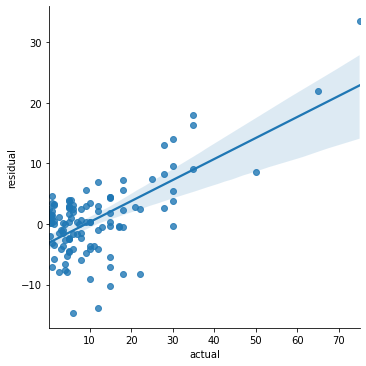

Root Mean Square Error:  6.487543299693295


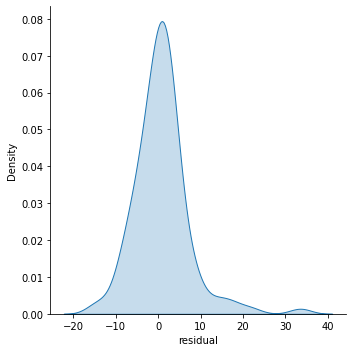

In [ ]:
y_pred = linridge_1.predict(X_test)  
print(y_pred.reshape(len(y_pred),1).shape,y_test.shape)
preds = y_pred.reshape(len(y_pred),1)
preds.shape
residual_df = pd.DataFrame(np.concatenate([y_test,preds,y_test-preds],axis = 1),columns=['actual','predicted','residual'])
sns.lmplot(x='actual',y='residual',data=residual_df)
plt.show()
print("Root Mean Square Error: ",np.sqrt(1/residual_df.shape[0]*(residual_df.residual).dot(residual_df.residual)))
sns.displot(residual_df, x="residual", kind="kde", fill=True)

Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train, y_train)

print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

lasso regression linear model intercept: [2.45552387]
lasso regression linear model coeff:
[-0.33101299  0.          0.00512785  1.73868994  0.          0.06783798
  0.          0.          0.          0.        ]
Non-zero features: 4
R-squared score (training): 0.676
R-squared score (test): 0.702

Features with non-zero weight (sorted by absolute magnitude):
	fpl_value, 1.739
	age, -0.331
	fpl_points, 0.068
	page_views, 0.005


Lasso Regression with effect of alpha regularization

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.00
Features kept: 10, r-squared training: 0.78, r-squared test: 0.72

Alpha = 0.20
Features kept: 5, r-squared training: 0.74, r-squared test: 0.66

Alpha = 0.40
Features kept: 3, r-squared training: 0.71, r-squared test: 0.63

Alpha = 0.60
Features kept: 3, r-squared training: 0.65, r-squared test: 0.59

Alpha = 0.80
Features kept: 3, r-squared training: 0.58, r-squared test: 0.53

Alpha = 1.00
Features kept: 3, r-squared training: 0.49, r-squared test: 0.47



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5610.091362052377, tolerance: 5.144515321739131
  positive)


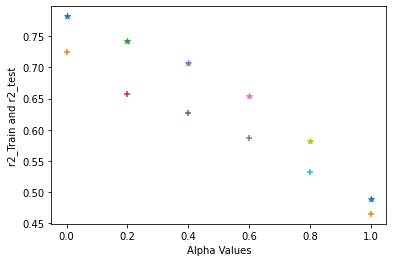

In [ ]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


for alpha in np.arange(0,1.2,0.2):
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    plt.scatter(alpha,r2_train,marker='*')
    plt.scatter(alpha,r2_test,marker='+')
    plt.xlabel('Alpha Values')
    plt.ylabel('r2_Train and r2_test')
    
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))


(116, 1) (116, 1)


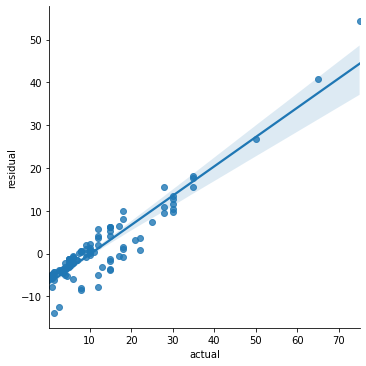

Root Mean Square Error:  9.020843866901254


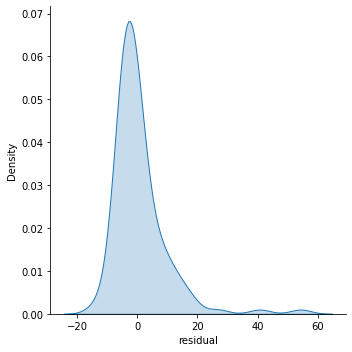

In [ ]:
y_pred = linlasso.predict(X_test_scaled)  
print(y_pred.reshape(len(y_pred),1).shape,y_test.shape)
preds = y_pred.reshape(len(y_pred),1)
preds.shape
residual_df = pd.DataFrame(np.concatenate([y_test,preds,y_test-preds],axis = 1),columns=['actual','predicted','residual'])
sns.lmplot(x='actual',y='residual',data=residual_df)
plt.show()
print("Root Mean Square Error: ",np.sqrt(1/residual_df.shape[0]*(residual_df.residual).dot(residual_df.residual)))
sns.displot(residual_df, x="residual", kind="kde", fill=True)

In [ ]:

seed = 13
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

# Create model
model_rcv = LassoCV(cv=kfold)

#Fit model
model_rcv.fit(X_train_scaled, y_train)
predictions = model_rcv.predict(X_train_scaled)
print("Train:", r2_score(y_train, predictions))

# Evaluate
predictions = model_rcv.predict(X_test_scaled)
print("Test:", r2_score(y_test, predictions))

print("Alpha:", model_rcv.alpha_)

Train: 0.7811182843214388
Test: 0.7181577582280962
Alpha: 0.0229934900129144


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
linlassos = Lasso(alpha=0.0).fit(X_train_scaled, y_train)

print('lasso regression linear model intercept: {}'
     .format(linlassos.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlassos.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlassos.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlassos.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlassos.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X), linlassos.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

lasso regression linear model intercept: [-1.38508054]
lasso regression linear model coeff:
[-6.45698218  2.2825438  11.10309924 33.73509548  6.75917215 13.23125937
  5.81749216  4.35736122  5.1145065   0.92778814]
Non-zero features: 10
R-squared score (training): 0.782
R-squared score (test): 0.725

Features with non-zero weight (sorted by absolute magnitude):
	fpl_value, 33.735
	fpl_points, 13.231
	page_views, 11.103
	fpl_sel, 6.759
	age, -6.457
	big_club, 5.817
	new_foreign, 5.115
	region, 4.357
	position_cat, 2.283
	new_signing, 0.928


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5610.091362052152, tolerance: 5.144515321739131
  positive)


KNeighbors 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knnreg = KNeighborsRegressor().fit(X_train_scaled, y_train)

print('R-squared score (training): {:.3f}'
     .format(knnreg.score(X_train_scaled, y_train)))
print('Mean-squared score (training): {:.3f}'
     .format(mean_squared_error(y_train,knnreg.predict(X_train_scaled))))
print('R-squared score (test): {:.3f}'
     .format(knnreg.score(X_test_scaled, y_test)))
print('Mean-squared score (test): {:.3f}'
     .format(mean_squared_error(y_test,knnreg.predict(X_test_scaled))))

R-squared score (training): 0.846
Mean-squared score (training): 23.037
R-squared score (test): 0.684
Mean-squared score (test): 48.050


In [ ]:
from sklearn import neighbors
from math import sqrt
rmse_val = [] 
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train_scaled, y_train)  #fit the model
    pred=model.predict(X_test_scaled) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 7.619946035649262
RMSE value for k=  2 is: 7.0027488445117285
RMSE value for k=  3 is: 7.425633704913016
RMSE value for k=  4 is: 7.253716626875994
RMSE value for k=  5 is: 6.931827519393475
RMSE value for k=  6 is: 6.711826614196924
RMSE value for k=  7 is: 6.5909368550856975
RMSE value for k=  8 is: 6.658243969390632
RMSE value for k=  9 is: 6.731865945179982
RMSE value for k=  10 is: 6.838525706335167
RMSE value for k=  11 is: 6.899033731558507
RMSE value for k=  12 is: 6.9342570235138625
RMSE value for k=  13 is: 6.943388151885896
RMSE value for k=  14 is: 7.1214841258067
RMSE value for k=  15 is: 7.209730493791252
RMSE value for k=  16 is: 7.350290712302541
RMSE value for k=  17 is: 7.29018779498493
RMSE value for k=  18 is: 7.334152044525527
RMSE value for k=  19 is: 7.414551142391351
RMSE value for k=  20 is: 7.415477519531187


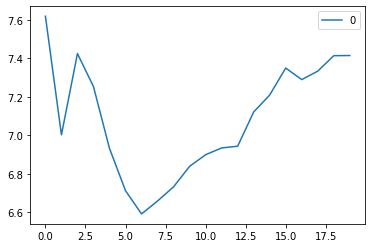

In [ ]:
curve = pd.DataFrame(rmse_val) 
curve.plot()

Getting perfect hyperparameters for prediction

In [ ]:
seed = 13
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)
hp_candidates = [{'n_neighbors': [2,3,4,5,6,7,8,9,10], 'weights': ['uniform','distance']}]
grid = GridSearchCV(estimator=knnreg, param_grid=hp_candidates, cv=kfold, scoring='r2')
grid.fit(X_train_scaled, y_train)
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.7121931576840664
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='distance')
{'n_neighbors': 4, 'weights': 'distance'}


In [ ]:
knnreg1 = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=4,
                    weights='distance').fit(X_train_scaled, y_train)

print('R-squared score (training): {:.3f}'
     .format(knnreg1.score(X_train_scaled, y_train)))
print('Mean-squared score (training): {:.3f}'
     .format(mean_squared_error(y_train,knnreg1.predict(X_train_scaled))))
print('R-squared score (test): {:.3f}'
     .format(knnreg1.score(X_test_scaled, y_test)))
print('Mean-squared score (test): {:.3f}'
     .format(mean_squared_error(y_test,knnreg1.predict(X_test_scaled))))

R-squared score (training): 1.000
Mean-squared score (training): 0.000
R-squared score (test): 0.720
Mean-squared score (test): 42.636


(116, 1) (116, 1)


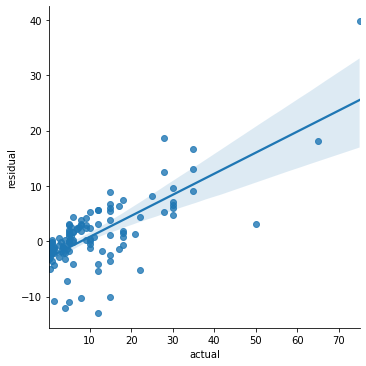

Root Mean Square Error:  6.5295972808599885


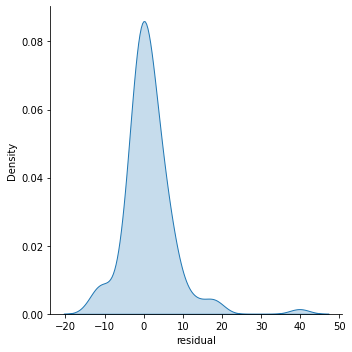

In [ ]:
y_pred = knnreg1.predict(X_test_scaled)  
print(y_pred.reshape(len(y_pred),1).shape,y_test.shape)
preds = y_pred.reshape(len(y_pred),1)
preds.shape
residual_df = pd.DataFrame(np.concatenate([y_test,preds,y_test-preds],axis = 1),columns=['actual','predicted','residual'])
sns.lmplot(x='actual',y='residual',data=residual_df)
plt.show()
print("Root Mean Square Error: ",np.sqrt(1/residual_df.shape[0]*(residual_df.residual).dot(residual_df.residual)))
sns.displot(residual_df, x="residual", kind="kde", fill=True)

RandomForest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state =40)
regressor.fit(X_train_scaled, y_train)  
print('R-squared score (training): {:.3f}'
     .format(regressor.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(regressor.score(X_test_scaled, y_test)))
print('Mean-squared score (training): {:.3f}'
     .format(mean_squared_error(y_train,regressor.predict(X_train_scaled))))
print('Mean-squared score (test): {:.3f}'
     .format(mean_squared_error(y_test,regressor.predict(X_test_scaled))))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


R-squared score (training): 0.969
R-squared score (test): 0.752
Mean-squared score (training): 4.690
Mean-squared score (test): 37.670


(116, 1) (116, 1)


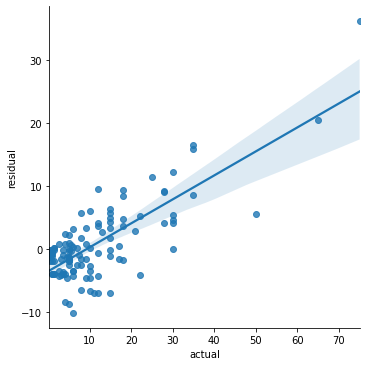

Root Mean Square Error:  6.137605919796752


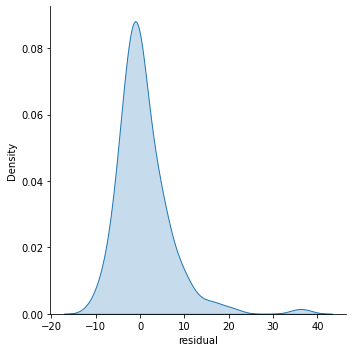

In [ ]:
y_pred = regressor.predict(X_test_scaled)  
print(y_pred.reshape(len(y_pred),1).shape,y_test.shape)
preds = y_pred.reshape(len(y_pred),1)
preds.shape
residual_df = pd.DataFrame(np.concatenate([y_test,preds,y_test-preds],axis = 1),columns=['actual','predicted','residual'])
sns.lmplot(x='actual',y='residual',data=residual_df)
plt.show()
print("Root Mean Square Error: ",np.sqrt(1/residual_df.shape[0]*(residual_df.residual).dot(residual_df.residual)))
sns.displot(residual_df, x="residual", kind="kde", fill=True)

Finding best Hyperparameters using SearchCV



In [ ]:
n_estimators=np.arange(10,200,10)
max_features=['auto','sqrt','log2']
max_depth=np.arange(10,200,10)
min_samples_split=np.arange(1,10,1)
min_samples_leaf=np.arange(1,10,1)
grid_param={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}
from sklearn.model_selection import RandomizedSearchCV
random=RandomizedSearchCV(estimator=regressor,param_distributions=grid_param,n_iter=500,
                      cv=5,verbose=2,random_state=40,n_jobs=-1)
random.fit(X_train_scaled,y_train)
random.best_params_


Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   56.0s
[Parallel(n_jobs=-1)]: Done 732 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1462 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 2352 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:  5.8min finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 140,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [ ]:
random.best_score_

0.7856726154146403

Model after getting best hyperparameters

In [ ]:
regressors = RandomForestRegressor(random_state =40,n_estimators=100,max_features='sqrt',max_depth=140,min_samples_split=6,min_samples_leaf=1)
regressors.fit(X_train_scaled, y_train)  
print('R-squared score (training): {:.3f}'
     .format(regressors.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(regressors.score(X_test_scaled, y_test)))
print('Mean-squared score (training): {:.3f}'
     .format(mean_squared_error(y_train,regressors.predict(X_train_scaled))))
print('Mean-squared score (test): {:.3f}'
     .format(mean_squared_error(y_test,regressors.predict(X_test_scaled))))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R-squared score (training): 0.936
R-squared score (test): 0.756
Mean-squared score (training): 9.529
Mean-squared score (test): 37.126


Feature Importance

In [ ]:
for importance, name in sorted(zip(regressors.feature_importances_, X_train.columns),reverse=True):
 print (name, importance)

fpl_value 0.28723218185460003
page_views 0.23390769980628268
fpl_points 0.14050891662992662
fpl_sel 0.13268569655337187
big_club 0.11894916216030035
age 0.05118369701910182
position_cat 0.016200619429302482
region 0.010063555349941373
new_signing 0.00557714373081415
new_foreign 0.0036913274663585467


(116, 1) (116, 1)


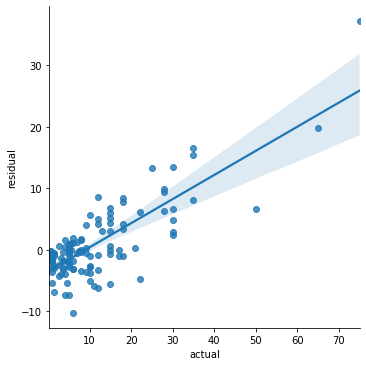

Root Mean Square Error:  6.093071217105261


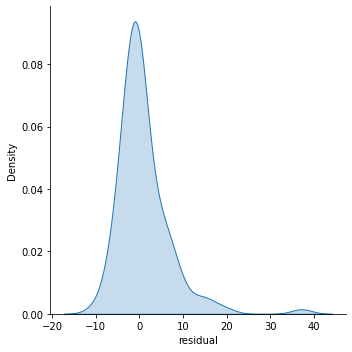

In [ ]:
y_pred = regressors.predict(X_test_scaled)  
print(y_pred.reshape(len(y_pred),1).shape,y_test.shape)
preds = y_pred.reshape(len(y_pred),1)
preds.shape
residual_df = pd.DataFrame(np.concatenate([y_test,preds,y_test-preds],axis = 1),columns=['actual','predicted','residual'])
sns.lmplot(x='actual',y='residual',data=residual_df)
plt.show()
print("Root Mean Square Error: ",np.sqrt(1/residual_df.shape[0]*(residual_df.residual).dot(residual_df.residual)))
sns.displot(residual_df, x="residual", kind="kde", fill=True)

Tree_regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(random_state = 0,criterion='mse',max_depth=7)
tree_regressor.fit(X_train_scaled, y_train)
print('R-squared score (training): {:.3f}'
     .format(tree_regressor.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(tree_regressor.score(X_test_scaled, y_test)))
print('Mean-squared score (training): {:.3f}'
     .format(mean_squared_error(y_train,tree_regressor.predict(X_train_scaled))))
print('Mean-squared score (test): {:.3f}'
     .format(mean_squared_error(y_test,tree_regressor.predict(X_test_scaled))))

R-squared score (training): 0.956
R-squared score (test): 0.731
Mean-squared score (training): 6.534
Mean-squared score (test): 40.911


Feature Importance

In [ ]:
for importance, name in sorted(zip(tree_regressor.feature_importances_, X_train.columns),reverse=True):
 print (name, importance)

fpl_value 0.4995569038583461
page_views 0.27031422252718684
age 0.08618974264485829
fpl_sel 0.08033161546424819
big_club 0.03461907063942977
region 0.0162132668665536
fpl_points 0.008564898500728996
position_cat 0.0025642748860630112
new_signing 0.0012061874813475088
new_foreign 0.0004398171312375144


(116, 1) (116, 1)


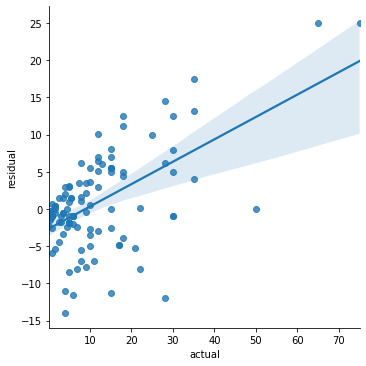

Root Mean Square Error:  6.396139022254587


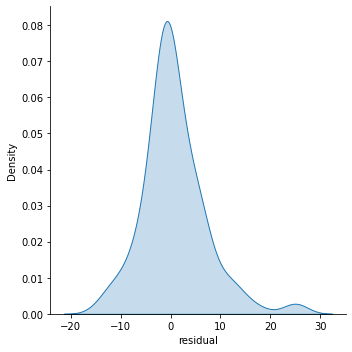

In [ ]:
y_pred = tree_regressor.predict(X_test_scaled) 
  
# print the predicted price 
print(y_pred.reshape(len(y_pred),1).shape,y_test.shape)
preds = y_pred.reshape(len(y_pred),1)
preds.shape
residual_df = pd.DataFrame(np.concatenate([y_test,preds,y_test-preds],axis = 1),columns=['actual','predicted','residual'])
sns.lmplot(x='actual',y='residual',data=residual_df)
plt.show()
print("Root Mean Square Error: ",np.sqrt(1/residual_df.shape[0]*(residual_df.residual).dot(residual_df.residual)))
sns.displot(residual_df, x="residual", kind="kde", fill=True)

GradientBoosted Regressor

In [ ]:
from sklearn.ensemble import  GradientBoostingRegressor

reg = GradientBoostingRegressor(n_estimators= 500,alpha=0.5,
          max_depth= 7.5,
          min_samples_split= 5,
          learning_rate= 0.01,
          loss= 'ls')
reg.fit(X_train_scaled, y_train)
print('R-squared score (training): {:.3f}'
     .format(reg.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(reg.score(X_test_scaled, y_test)))
print('Mean-squared score (training): {:.3f}'
     .format(mean_squared_error(y_train,reg.predict(X_train_scaled))))
print('Mean-squared score (test): {:.3f}'
     .format(mean_squared_error(y_test,reg.predict(X_test_scaled))))



/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R-squared score (training): 0.998
R-squared score (test): 0.749
Mean-squared score (training): 0.352
Mean-squared score (test): 38.221


Feature Importance

In [ ]:
for importance, name in sorted(zip(reg.feature_importances_, X_train.columns),reverse=True):
 print (name, importance)

fpl_value 0.39189805276075496
page_views 0.3604468145808436
age 0.07118564095045044
fpl_sel 0.0697587406231447
fpl_points 0.04754561670214777
big_club 0.025149799572952818
position_cat 0.014823492521419457
region 0.012584731484987316
new_signing 0.005483988394699492
new_foreign 0.001123122408599474


(116, 1) (116, 1)


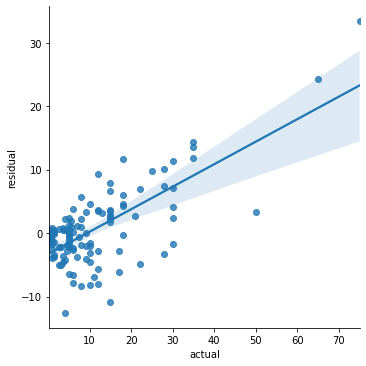

Root Mean Square Error:  6.182300975532012


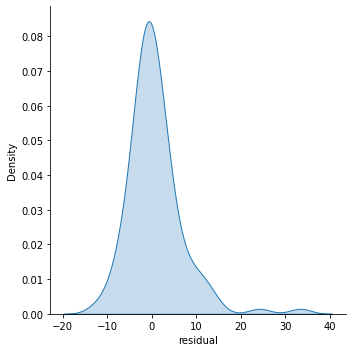

In [ ]:
y_pred = reg.predict(X_test_scaled) 
  
# print the predicted price 
print(y_pred.reshape(len(y_pred),1).shape,y_test.shape)
preds = y_pred.reshape(len(y_pred),1)
preds.shape
residual_df = pd.DataFrame(np.concatenate([y_test,preds,y_test-preds],axis = 1),columns=['actual','predicted','residual'])
sns.lmplot(x='actual',y='residual',data=residual_df)
plt.show()
print("Root Mean Square Error: ",np.sqrt(1/residual_df.shape[0]*(residual_df.residual).dot(residual_df.residual)))
sns.displot(residual_df, x="residual", kind="kde", fill=True)

In [ ]:
frame={'Models':['Linear_Regression','Ridge_Regression','Lasso_Regression','Nearest_Neighbors','Random_Forest',
                 'Tree_Regression','Gradient_Boost'],
       'R2-Score(Test)':[accuracy,linridge.score(X_test, y_test),linlassos.score(X_test_scaled, y_test),
                         knnreg1.score(X_test_scaled, y_test),regressors.score(X_test_scaled, y_test),
                         tree_regressor.score(X_test_scaled, y_test),reg.score(X_test_scaled, y_test)],
       'Mean-Squared(Test)':[mean_squared_error(y_test,predictions),mean_squared_error(y_test,linridge.predict(X_test)),
                             mean_squared_error(y_test,linlassos.predict(X_test_scaled)),
                             mean_squared_error(y_test,knnreg1.predict(X_test_scaled)),
                             mean_squared_error(y_test,regressors.predict(X_test_scaled)),
                             mean_squared_error(y_test,tree_regressor.predict(X_test_scaled)),
                             mean_squared_error(y_test,reg.predict(X_test_scaled))]}
DataFrame=pd.DataFrame(frame,index=['1','2','3','4','5','6','7'])
DataFrame
                                                

,Models,R2-Score(Test),Mean-Squared(Test)
1,Linear_Regression,0.765998,42.893111
2,Ridge_Regression,0.703908,45.061698
3,Lasso_Regression,0.724754,41.889249
4,Nearest_Neighbors,0.719850,42.635641
5,Random_Forest,0.756055,37.125517
6,Tree_Regression,0.731184,40.910594
7,Gradient_Boost,0.748858,38.220845


Via using a version of genetic programming to automatically design and optimize a series of data transformations and machine learning models that attempt to maximize the classification accuracy for a given supervised learning data set.

In [ ]:
!pip install TPOT
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=10, population_size=50, verbosity=2)
tpot.fit(X_train_scaled, y_train)
print(tpot.score(X_test_scaled, y_test))
tpot.export('tpot_boston_pipeline.py')

     |████████████████████████████████| 92kB 4.0MB/s 
     |████████████████████████████████| 163kB 9.3MB/s 
     |████████████████████████████████| 166.7MB 93kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp37-none-any.whl size=11954 sha256=4125520d753fd74f9d33c47da99a65a13d4775cf9f357ef009c0c30411c3cd26
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Generation 1 - Current best internal CV score: -27.55928301222237

Generation 2 - Current best internal CV score: -27.55928301222237

Generation 3 - Current best internal CV score: -27.55928301222237

Generation 4 - Current best internal CV score: -27.55928301222237

Generation 5 - Current best internal CV score: -27.55928301222237

Generation 6 - Current best internal CV score: -27.55928301222237

Generation 7 - Current best internal CV score: -27.55928301222237

Generation 8 - Current best internal CV score: -26.607133605468427

Generation 9 - Current best internal CV score: -26.607133605468427

Generation 10 - Current best internal CV score: -26.57560972975772

Best pipeline: XGBRegressor(VarianceThreshold(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), threshold=0.005), learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.55, verbosity=0)
-38.723295784425154


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
